# 环境说明

In [2]:
# 安装所需的包
install.packages("rms")

package 'rms' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AFAN\AppData\Local\Temp\RtmpqWt5eG\downloaded_packages


In [5]:
sessionInfo()

R version 4.4.1 (2024-06-14 ucrt)
Platform: x86_64-w64-mingw32/x64
Running under: Windows 11 x64 (build 22631)

Matrix products: default


locale:
[1] LC_COLLATE=Chinese (Simplified)_China.utf8 
[2] LC_CTYPE=Chinese (Simplified)_China.utf8   
[3] LC_MONETARY=Chinese (Simplified)_China.utf8
[4] LC_NUMERIC=C                               
[5] LC_TIME=Chinese (Simplified)_China.utf8    

time zone: Asia/Shanghai
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37     IRdisplay_1.1     utf8_1.2.4        base64enc_0.1-3  
 [5] fastmap_1.2.0     glue_1.8.0        htmltools_0.5.8.1 repr_1.1.7       
 [9] lifecycle_1.0.4   cli_3.6.3         fansi_1.0.6       vctrs_0.6.5      
[13] pbdZMQ_0.3-13     compiler_4.4.1    tools_4.4.1       evaluate_1.0.1   
[17] pillar_1.9.0      crayon_1.5.3      rlang_1.1.4       jsonlite_1.8.9   
[21] IRkernel_1.3.2    uuid_1.2-1  

# 代码实现

In [34]:
# 加载所需的包
library(rms)

In [11]:
# 读取数据
data <- read.csv("data/train.csv")

In [12]:
head(data)

,Age,Blood_Sugar,Blood_Pressure,Weight,Heart_Disease
,<int>,<dbl>,<dbl>,<dbl>,<int>
1,58,99.97546,106.3281,62.44868,0
2,71,93.60951,134.1907,67.87585,0
3,48,119.13195,115.7733,49.26310,0
4,34,98.62651,117.6520,93.11179,0
5,62,114.05609,119.4568,71.04322,0
6,27,91.46011,131.4862,80.83883,0


## lrm

In [75]:
# 开始建模
model <- lrm(Heart_Disease ~ ., data = data)
print(model)
# 计算概率预测值
probabilities <- predict(model)
# 设定阈值 0.5，将概率值转换为 0/1 分类
predicted_class <- ifelse(probabilities > 0.5, 1, 0)
# 计算准确率
accuracy <- mean(predicted_class == data$Heart_Disease)
print(paste("模型准确率:", round(accuracy, 4)))

Logistic Regression Model

lrm(formula = Heart_Disease ~ ., data = data)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs          1000    LR chi2     238.07     R2       0.859    C       0.997    
 0            968    d.f.             4    R2(4,1000)0.209    Dxy     0.994    
 1             32    Pr(> chi2) <0.0001    R2(4,92.9)0.919    gamma   0.994    
max |deriv| 2e-05                           Brier    0.007    tau-a   0.062    

               Coef      S.E.    Wald Z Pr(>|Z|)
Intercept      -109.6707 24.8000 -4.42  <0.0001 
Age               0.4953  0.1116  4.44  <0.0001 
Blood_Sugar       0.5558  0.1228  4.52  <0.0001 
Blood_Pressure    0.0135  0.0213  0.63  0.5270  
Weight            0.0647  0.0307  2.11  0.0352  

[1] "模型准确率: 0.991"


datadist是rms包中的一个函数，用于存储与模型相关的变量分布信息，通常包括每个变量的最小值、最大值、均值、标准差等统计信息。这些信息在某些模型或绘图过程中是必需的，尤其是在进行变量选择、变量标准化或图形绘制时。

In [76]:
dd <- datadist(data)
# 设置Total Points的范围
options(datadist = "dd")

# 绘制列线图
nom <- nomogram(model, 
                fun = plogis,         # 将模型的logit转化为概率
                funlabel = "Probability of Heart Disease", 
                fun.at=c(0.01, 0.99),
                lp = FALSE)           # 不显示log-odds

In [77]:
nom

Warning message in min(x, na.rm = na.rm):
"no non-missing arguments to min; returning Inf"
Warning message in max(x, na.rm = na.rm):
"no non-missing arguments to max; returning -Inf"
Warning message in min(x, na.rm = na.rm):
"no non-missing arguments to min; returning Inf"
Warning message in max(x, na.rm = na.rm):
"no non-missing arguments to max; returning -Inf"


Points per unit of linear predictor: NaN 
Linear predictor units per point   : NaN 


 Age Points
 20   0    
 25   4    
 30   9    
 35  13    
 40  18    
 45  22    
 50  27    
 55  31    
 60  36    
 65  40    
 70  45    
 75  49    
 80  53    


 Blood_Sugar Points
  50           0   
  60          10   
  70          20   
  80          30   
  90          40   
 100          50   
 110          60   
 120          70   
 130          80   
 140          90   
 150         100   


 Blood_Pressure Points
  50            0     
  60            0     
  70            0     
  80            1     
  90            1     
 100            1     
 110            1     
 120            2     
 130            2     
 140            2     
 150            2     
 160            3     
 170            3     
 180            3     
 190            3     


 Weight Points
  10     0    
  20     1    
  30     2    
  40     3    
  50     5    
  60     6    
  70     7    
  80     8  

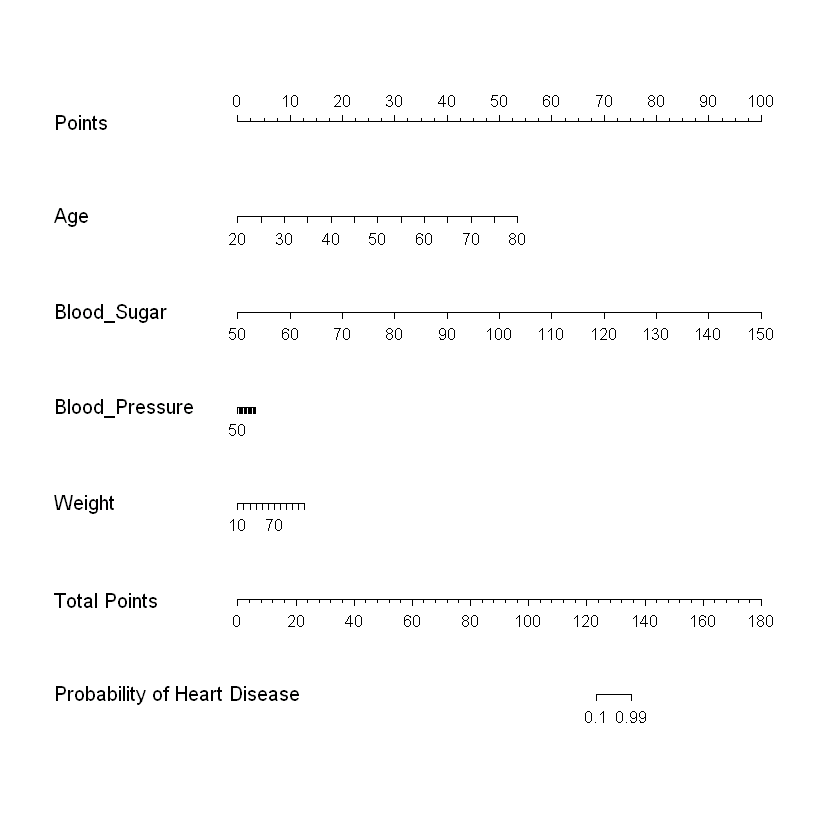

In [74]:
# 显示列线图
plot(nom, xlim=c(0, 100))